In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

In [102]:
# Check for GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs found: {len(gpus)}")
    for gpu in gpus:
        print(f" - {gpu.name}")
else:
    print("No GPUs found.")

No GPUs found.


In [103]:
df = pd.read_csv("../data/processed/combined_data.csv")

In [104]:
df.head()

,Unnamed: 0,timestamp,temperature_c,feels_like_c,pressure_hpa,humidity_percent,wind_speed_m_s,wind_direction_deg,cloudiness_percent,weather_description,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,0,1704042000,20.96,21.20,1017,80,2.58,153,5,clear sky,2483.37,0.00,69.92,70.81,63.90,309.64,360.90,27.61,5
1,1,1704045600,20.96,21.25,1017,82,2.20,157,1,clear sky,3257.75,0.00,93.22,44.35,77.25,359.17,417.28,37.49,5
2,2,1704049200,19.96,20.20,1016,84,2.01,151,15,few clouds,3364.56,0.00,98.71,29.33,77.25,360.78,416.96,35.97,5
3,3,1704052800,19.96,20.18,1016,83,1.85,137,33,scattered clouds,3097.53,0.01,94.59,22.35,75.34,339.49,390.03,31.41,5
4,4,1704056400,19.96,20.13,1016,81,1.80,128,52,broken clouds,2830.51,0.02,87.05,18.95,78.20,324.52,370.31,29.64,5


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7966 non-null   int64  
 1   timestamp            7966 non-null   int64  
 2   temperature_c        7966 non-null   float64
 3   feels_like_c         7966 non-null   float64
 4   pressure_hpa         7966 non-null   int64  
 5   humidity_percent     7966 non-null   int64  
 6   wind_speed_m_s       7966 non-null   float64
 7   wind_direction_deg   7966 non-null   int64  
 8   cloudiness_percent   7966 non-null   int64  
 9   weather_description  7966 non-null   object 
 10  CO                   7966 non-null   float64
 11  NO                   7966 non-null   float64
 12  NO2                  7966 non-null   float64
 13  O3                   7966 non-null   float64
 14  SO2                  7966 non-null   float64
 15  PM2_5                7966 non-null   f

In [106]:
# Turn all categories into numbers
df_one_hot = pd.get_dummies(df)
df_one_hot.head()  # view the converted columns

,Unnamed: 0,timestamp,temperature_c,feels_like_c,pressure_hpa,humidity_percent,wind_speed_m_s,wind_direction_deg,cloudiness_percent,CO,...,weather_description_broken clouds,weather_description_clear sky,weather_description_extreme rain,weather_description_few clouds,weather_description_heavy intensity rain,weather_description_light rain,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_very heavy rain
0,0,1704042000,20.96,21.20,1017,80,2.58,153,5,2483.37,...,False,True,False,False,False,False,False,False,False,False
1,1,1704045600,20.96,21.25,1017,82,2.20,157,1,3257.75,...,False,True,False,False,False,False,False,False,False,False
2,2,1704049200,19.96,20.20,1016,84,2.01,151,15,3364.56,...,False,False,False,True,False,False,False,False,False,False
3,3,1704052800,19.96,20.18,1016,83,1.85,137,33,3097.53,...,False,False,False,False,False,False,False,False,True,False
4,4,1704056400,19.96,20.13,1016,81,1.80,128,52,2830.51,...,True,False,False,False,False,False,False,False,False,False


In [107]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                7966 non-null   int64  
 1   timestamp                                 7966 non-null   int64  
 2   temperature_c                             7966 non-null   float64
 3   feels_like_c                              7966 non-null   float64
 4   pressure_hpa                              7966 non-null   int64  
 5   humidity_percent                          7966 non-null   int64  
 6   wind_speed_m_s                            7966 non-null   float64
 7   wind_direction_deg                        7966 non-null   int64  
 8   cloudiness_percent                        7966 non-null   int64  
 9   CO                                        7966 non-null   float64
 10  NO                                  

In [108]:
# Create X & y values
X = df_one_hot.drop(columns=['Unnamed: 0', 'timestamp', 'CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2_5', 'PM10', 'NH3', 'AQI'],
                    axis=1)

y = df.loc[:, ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2_5', 'PM10', 'NH3', 'AQI']]

In [109]:
# View features
X.head()

,temperature_c,feels_like_c,pressure_hpa,humidity_percent,wind_speed_m_s,wind_direction_deg,cloudiness_percent,weather_description_broken clouds,weather_description_clear sky,weather_description_extreme rain,weather_description_few clouds,weather_description_heavy intensity rain,weather_description_light rain,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_very heavy rain
0,20.96,21.20,1017,80,2.58,153,5,False,True,False,False,False,False,False,False,False,False
1,20.96,21.25,1017,82,2.20,157,1,False,True,False,False,False,False,False,False,False,False
2,19.96,20.20,1016,84,2.01,151,15,False,False,False,True,False,False,False,False,False,False
3,19.96,20.18,1016,83,1.85,137,33,False,False,False,False,False,False,False,False,True,False
4,19.96,20.13,1016,81,1.80,128,52,True,False,False,False,False,False,False,False,False,False


In [110]:
# View labels
y.head()

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,2483.37,0.00,69.92,70.81,63.90,309.64,360.90,27.61,5
1,3257.75,0.00,93.22,44.35,77.25,359.17,417.28,37.49,5
2,3364.56,0.00,98.71,29.33,77.25,360.78,416.96,35.97,5
3,3097.53,0.01,94.59,22.35,75.34,339.49,390.03,31.41,5
4,2830.51,0.02,87.05,18.95,78.20,324.52,370.31,29.64,5


Data Preprocessing

In [111]:
from sklearn.preprocessing import StandardScaler

# Normalize inputs and targets
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split into training, validation, and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Model Architecture

In [112]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='linear')  # Output layer for multiple targets
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


D:\Projects\air-quality-prediction-system\prediction-engine\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training

In [113]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('../models/best_model.keras', save_best_only=True, monitor='val_loss')
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5686 - mean_absolute_error: 0.8667 - val_loss: 0.6595 - val_mean_absolute_error: 0.5465
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9313 - mean_absolute_error: 0.6083 - val_loss: 0.5943 - val_mean_absolute_error: 0.5024
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8537 - mean_absolute_error: 0.5613 - val_loss: 0.5688 - val_mean_absolute_error: 0.4800
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8194 - mean_absolute_error: 0.5351 - val_loss: 0.5591 - val_mean_absolute_error: 0.4730
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7914 - mean_absolute_error: 0.5219 - val_loss: 0.5549 - val_mean_absolute_error: 0.4712
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7822 - mean_absolute_error: 0.5125 - val_loss: 0.5496 - val_mean_absolute_error: 0.4680
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7659 - mean_absolute_error: 0.5

Evaluation

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


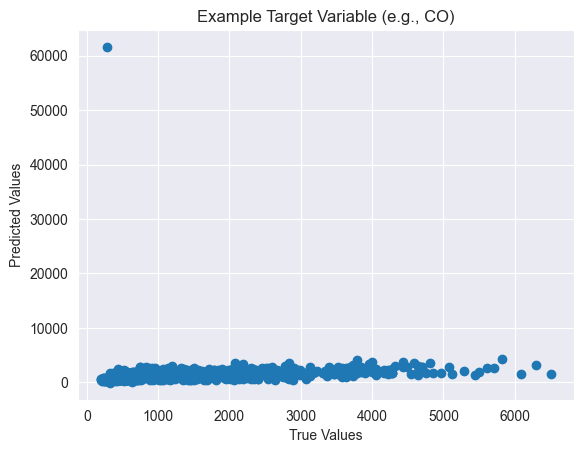

In [114]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_pred = model.predict(X_test)

# Reverse scaling
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

# Metrics
r2 = r2_score(y_test_original, y_pred_original, multioutput='raw_values')
mse = mean_squared_error(y_test_original, y_pred_original, multioutput='raw_values')

# Plot example
plt.scatter(y_test_original[:, 0], y_pred_original[:, 0])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Example Target Variable (e.g., CO)')
plt.show()

Loss Curve
This shows how the training and validation loss change over epochs.

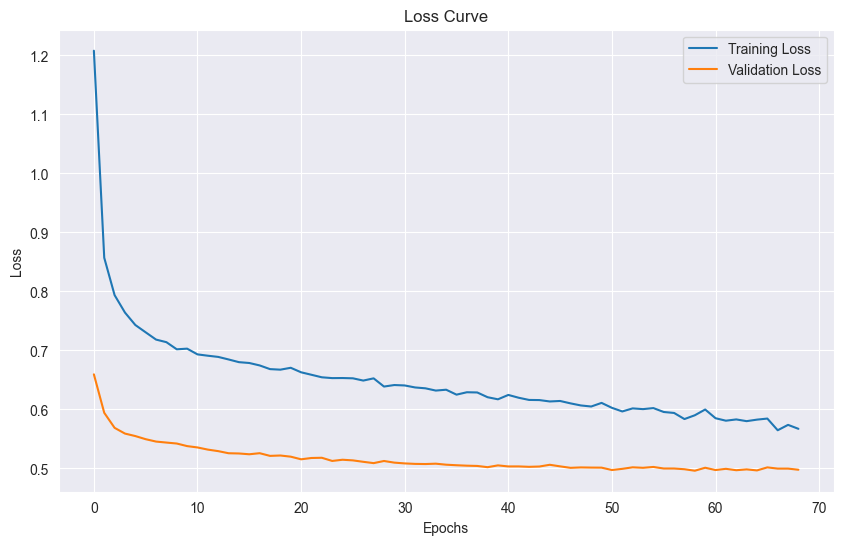

In [115]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Predicted vs True Values
Compare the predicted and true values for all target variables.

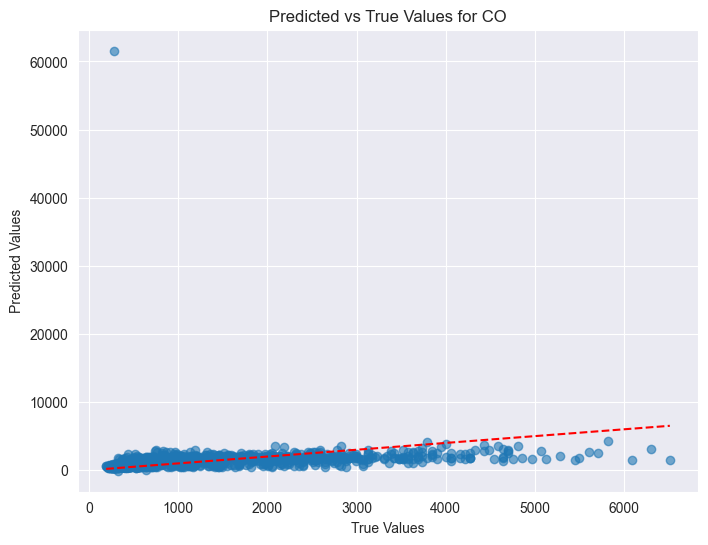

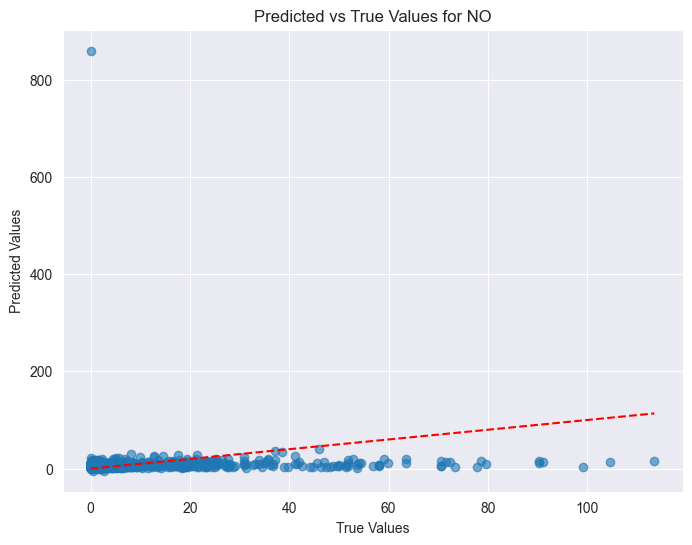

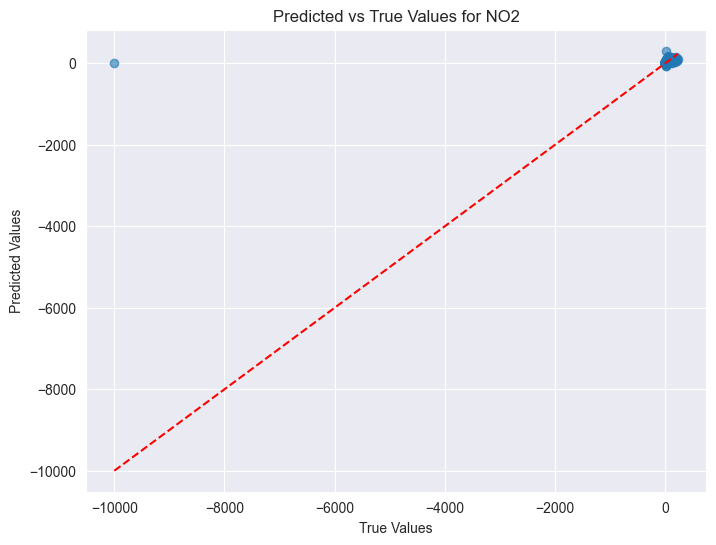

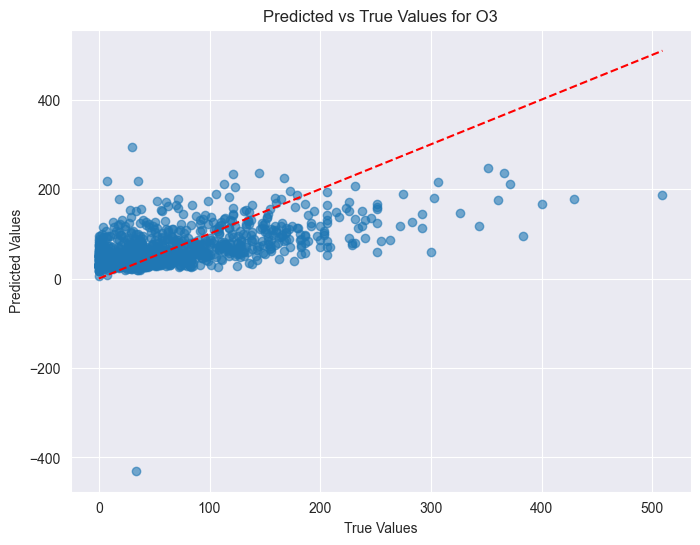

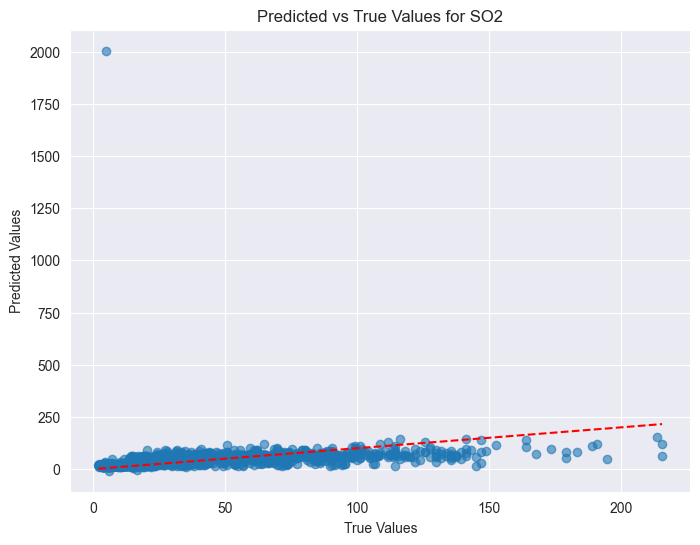

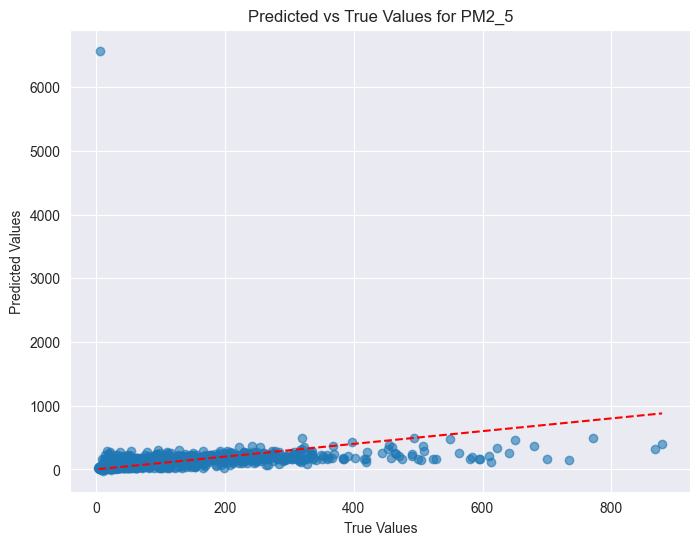

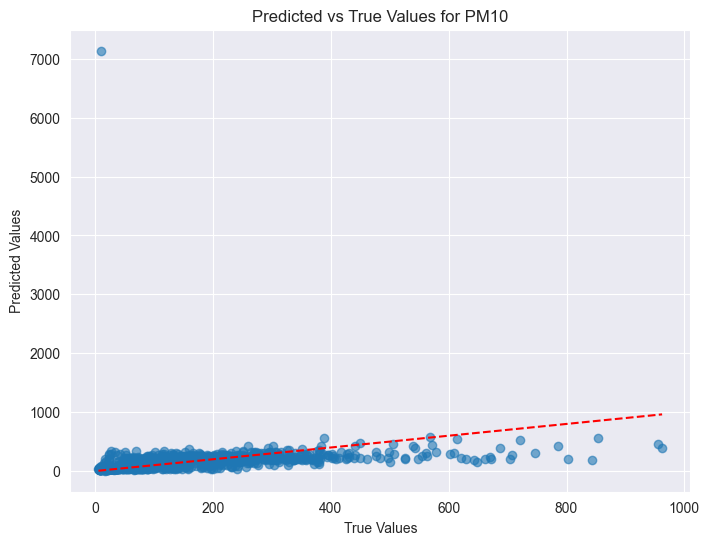

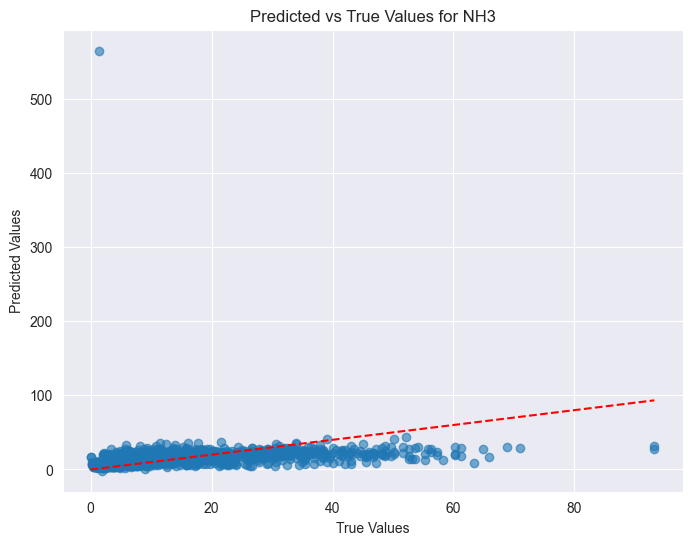

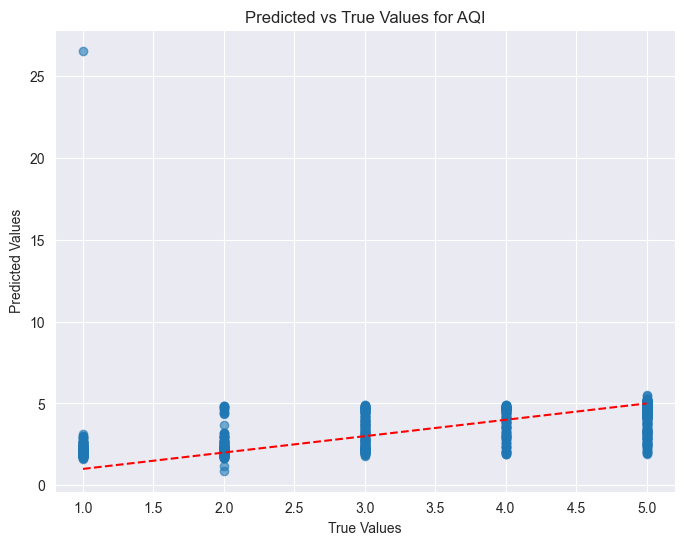

In [116]:
# Assuming y_test_original and y_pred_original contain true and predicted values
import numpy as np

for i, col in enumerate(y.columns):  # Assuming y.columns has target variable names
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_original[:, i], y_pred_original[:, i], alpha=0.6)
    plt.title(f'Predicted vs True Values for {col}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_test_original[:, i].min(), y_test_original[:, i].max()],
             [y_test_original[:, i].min(), y_test_original[:, i].max()], 'r--')
    plt.show()


Residual Distribution
Residuals are the differences between true and predicted values. Plotting their distribution shows how well the model predicts.


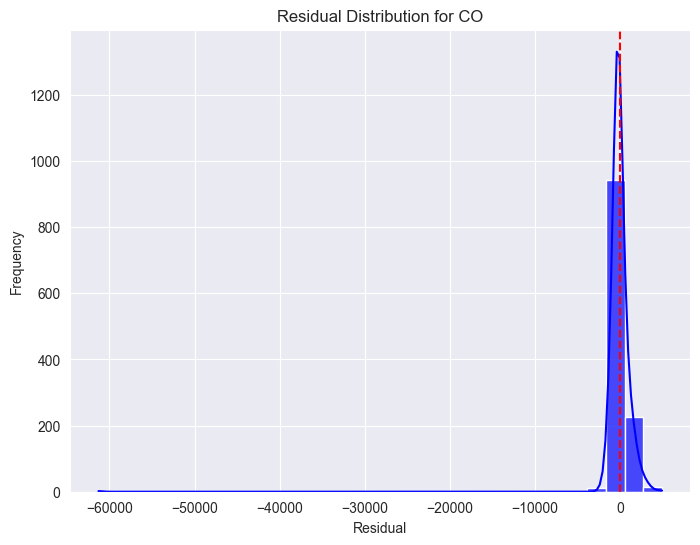

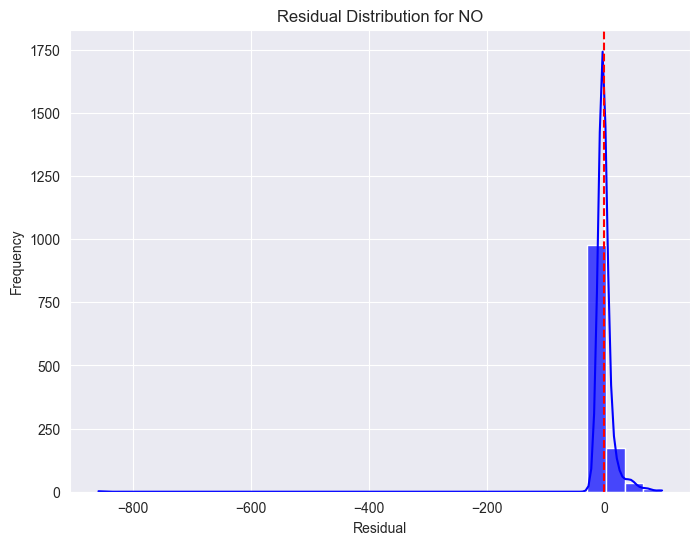

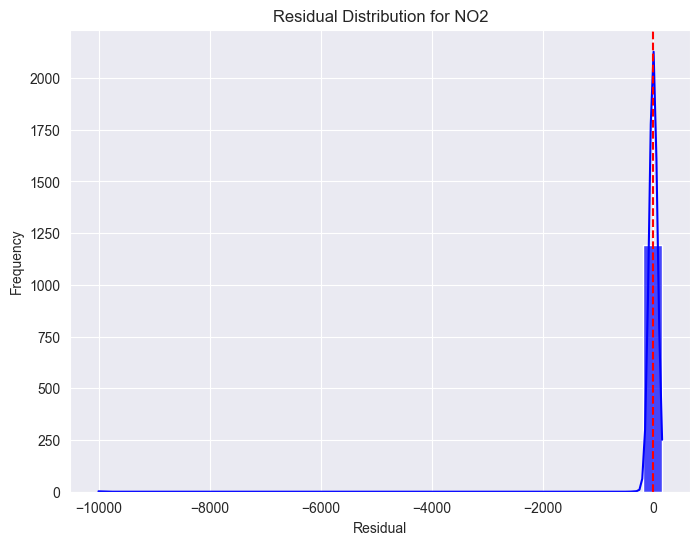

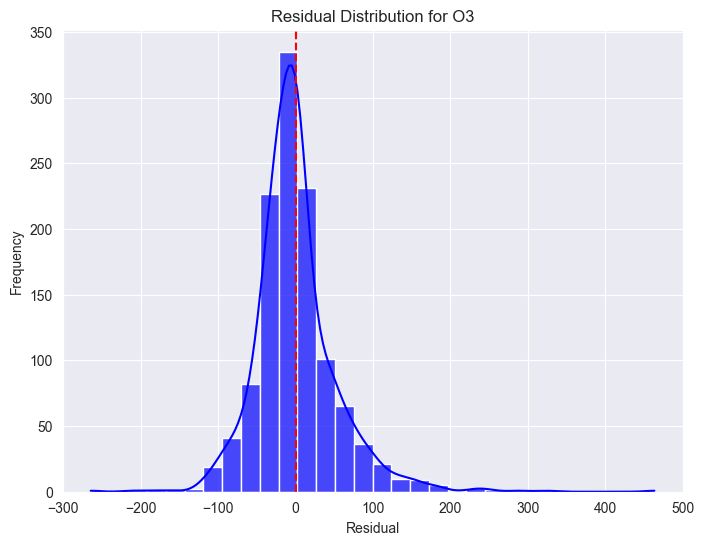

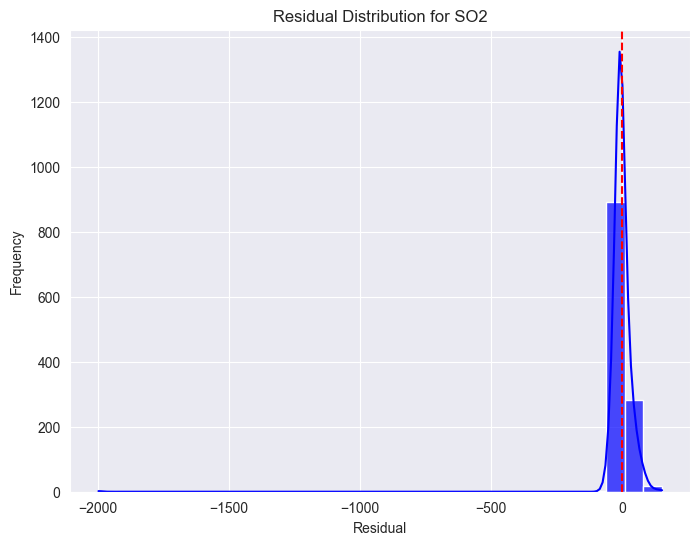

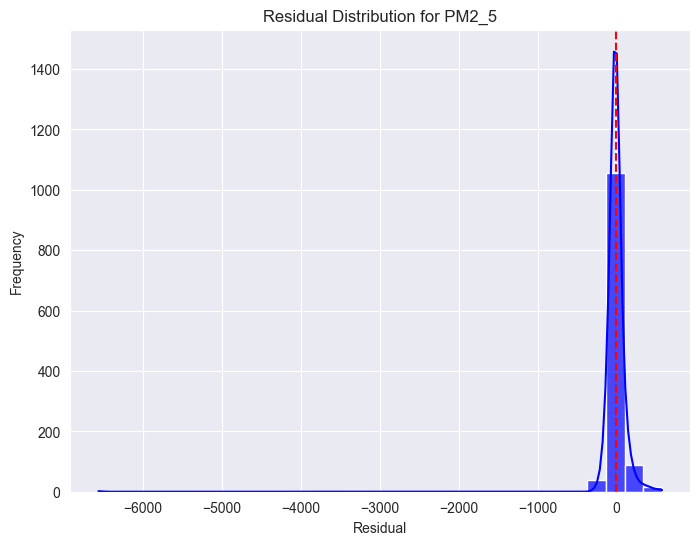

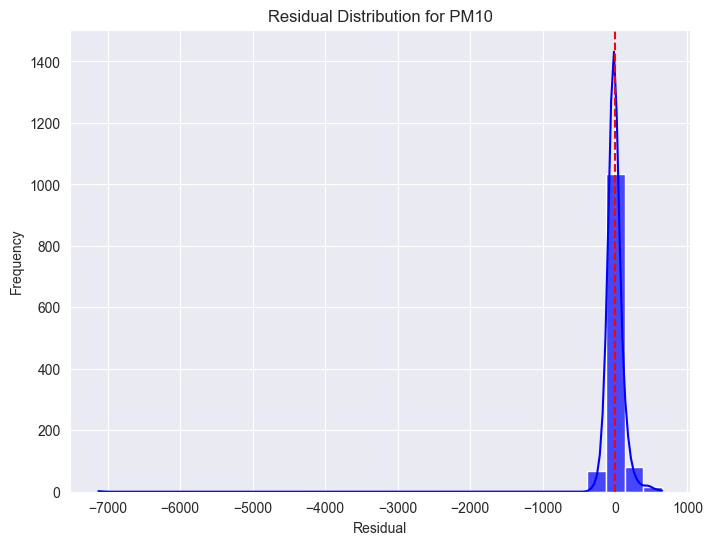

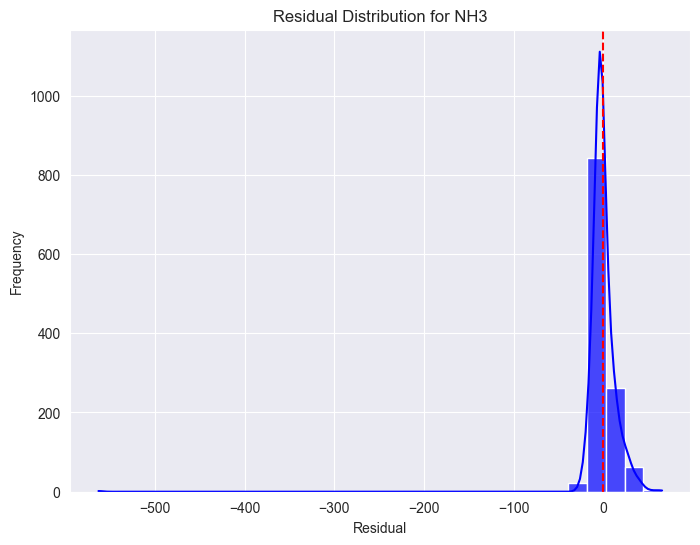

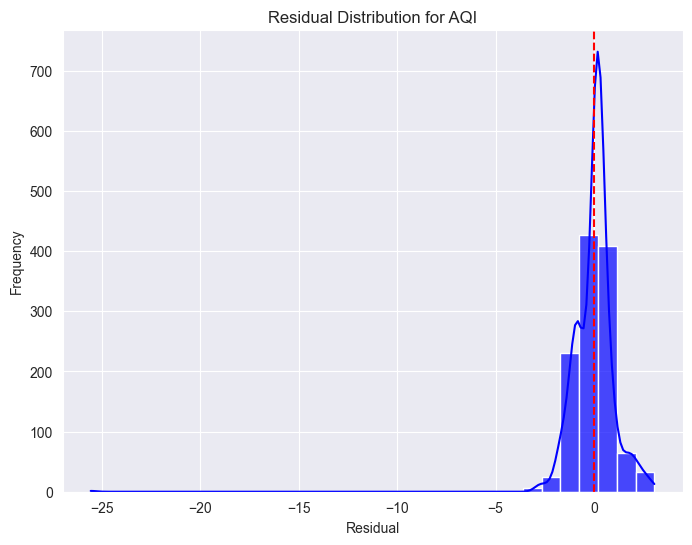

In [117]:
import seaborn as sns

for i, col in enumerate(y.columns):
    residuals = y_test_original[:, i] - y_pred_original[:, i]
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Residual Distribution for {col}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.axvline(0, color='red', linestyle='--')
    plt.show()


R-Squared for Each Target

Show the R-squared value for each target variable.

  Target Variable  R-Squared  Mean Squared Error
0              CO  -2.069933        3.882265e+06
1              NO  -2.985333        7.857683e+02
2             NO2   0.010327        8.474248e+04
3              O3   0.337984        2.866433e+03
4             SO2  -1.909461        4.098647e+03
5           PM2_5  -1.882608        4.388707e+04
6            PM10  -1.670783        5.248298e+04
7             NH3  -0.986239        3.991456e+02
8             AQI   0.417814        1.369493e+00


<Figure size 1000x600 with 0 Axes>

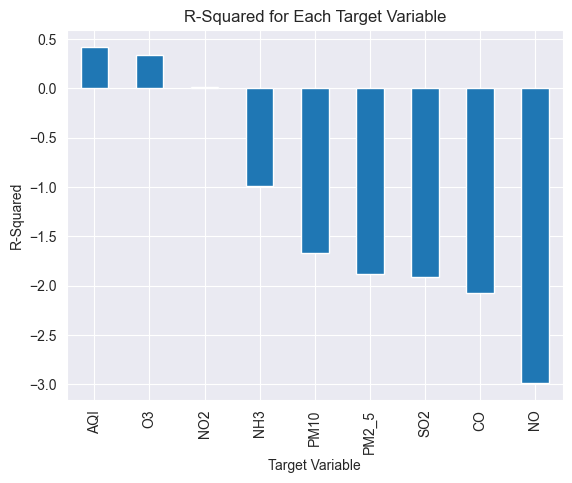

In [118]:
r2 = r2_score(y_test_original, y_pred_original, multioutput='raw_values')
mse = mean_squared_error(y_test_original, y_pred_original, multioutput='raw_values')

performance_metrics = pd.DataFrame({
    'Target Variable': y.columns,
    'R-Squared': r2,
    'Mean Squared Error': mse
})

print(performance_metrics)

# Bar plot of R-Squared
plt.figure(figsize=(10, 6))
performance_metrics.sort_values(by='R-Squared', ascending=False).plot(
    x='Target Variable', y='R-Squared', kind='bar', legend=False
)
plt.title('R-Squared for Each Target Variable')
plt.ylabel('R-Squared')
plt.show()


Error Heatmap

Visualize the error (residuals) for each target variable as a heatmap.

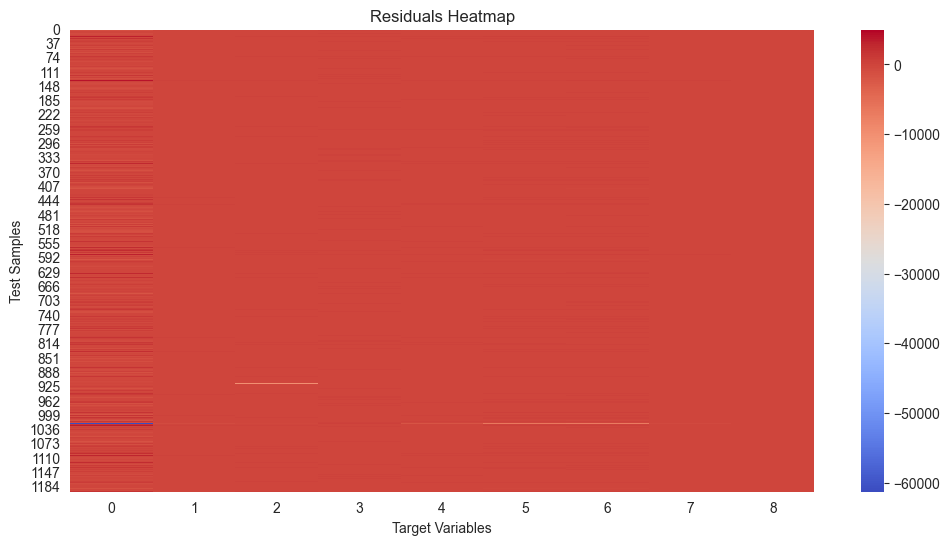

In [119]:
residuals_matrix = y_test_original - y_pred_original
plt.figure(figsize=(12, 6))
sns.heatmap(residuals_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Residuals Heatmap')
plt.xlabel('Target Variables')
plt.ylabel('Test Samples')
plt.show()

Cumulative Distribution of Residuals

Cumulative distribution helps visualize if the residuals are centered around zero.

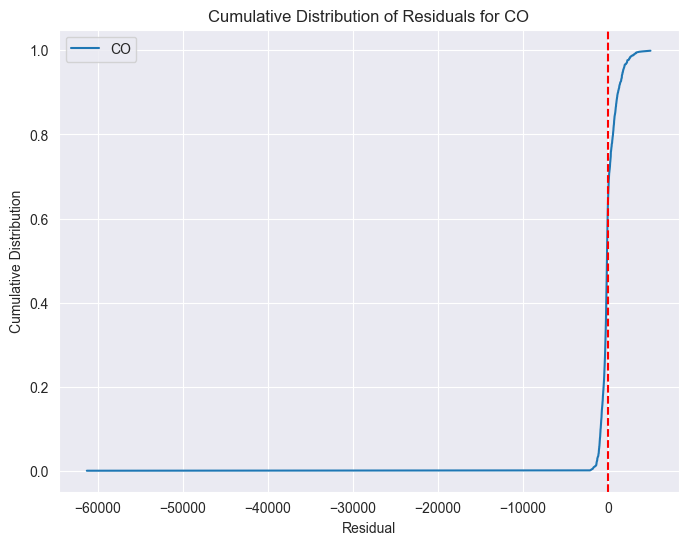

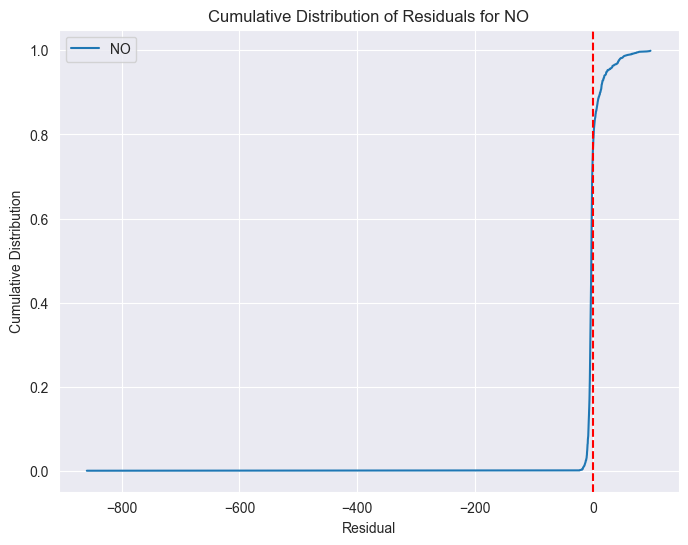

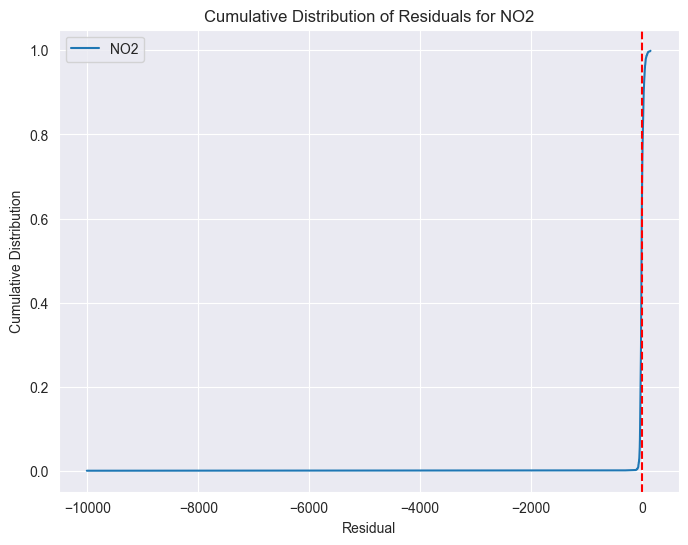

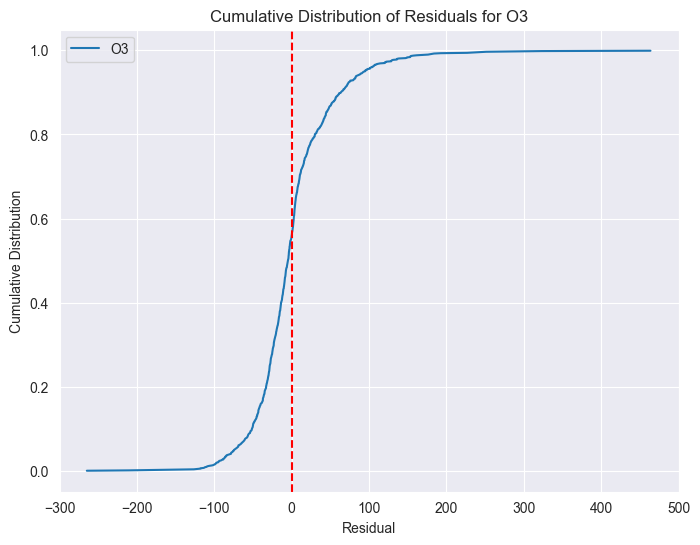

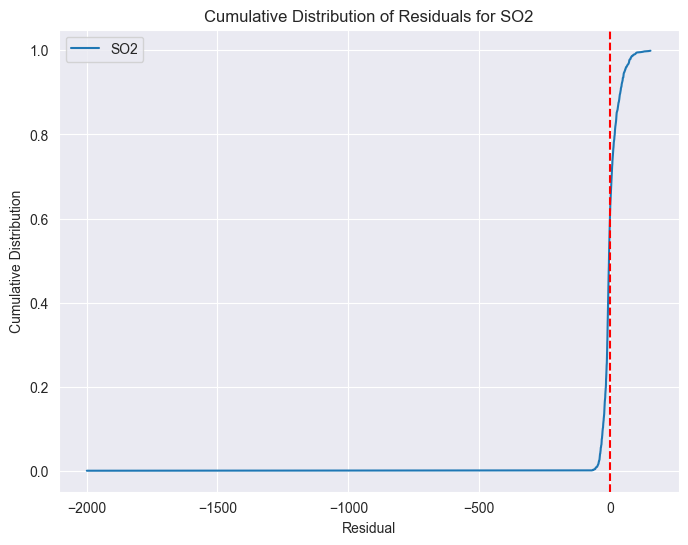

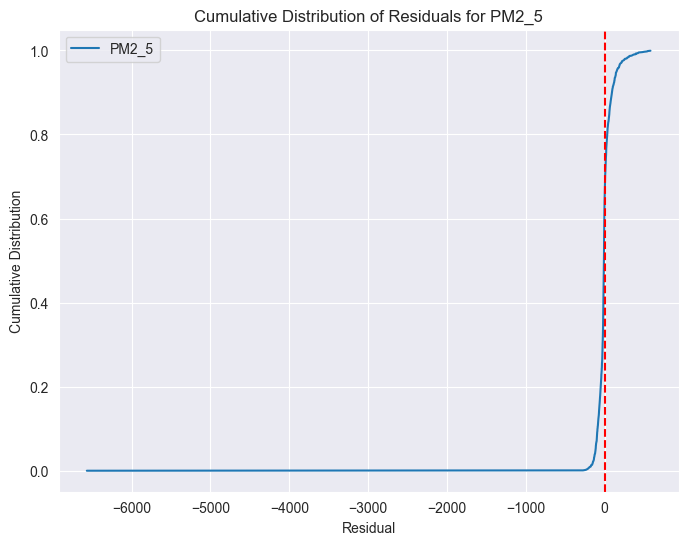

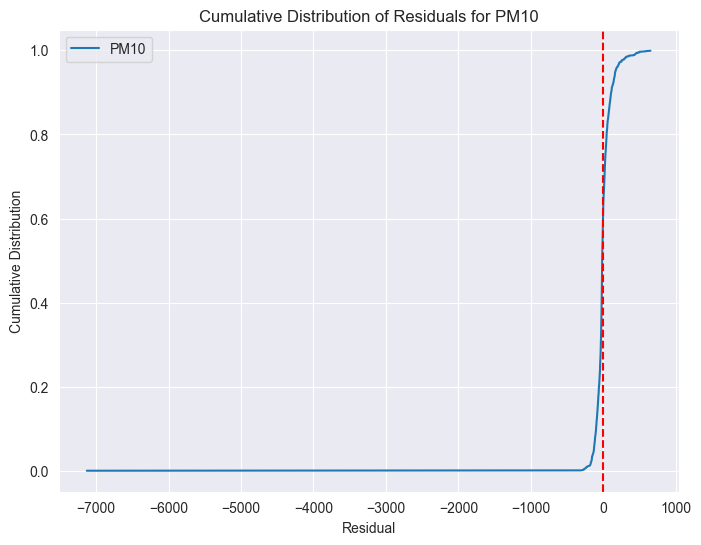

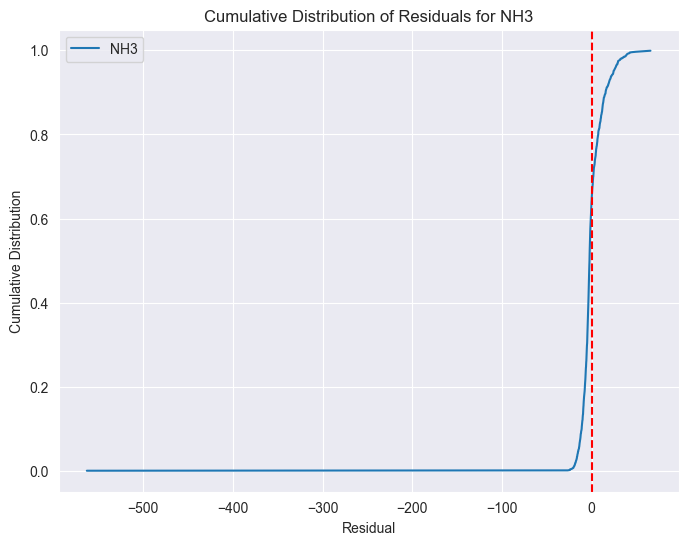

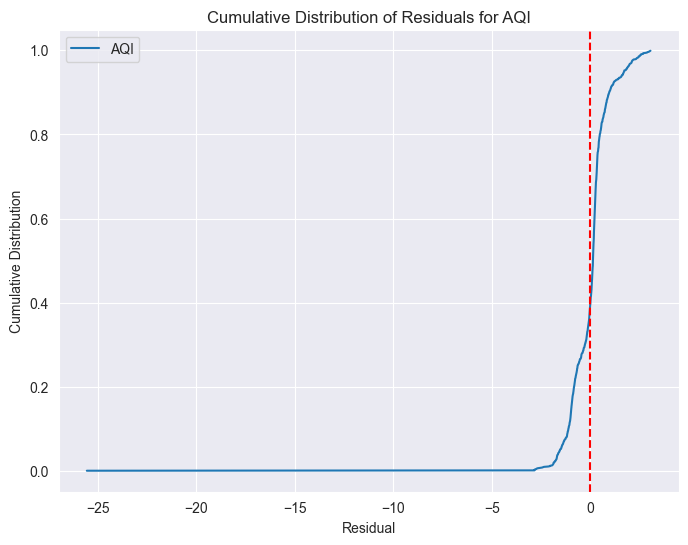

In [120]:
for i, col in enumerate(y.columns):
    residuals = y_test_original[:, i] - y_pred_original[:, i]
    sorted_residuals = np.sort(residuals)
    cumulative_distribution = np.arange(len(residuals)) / float(len(residuals))

    plt.figure(figsize=(8, 6))
    plt.plot(sorted_residuals, cumulative_distribution, label=col)
    plt.title(f'Cumulative Distribution of Residuals for {col}')
    plt.xlabel('Residual')
    plt.ylabel('Cumulative Distribution')
    plt.axvline(0, color='red', linestyle='--')
    plt.legend()
    plt.show()
